# Libraries

In cell below run <kbd>⇧ Shift</kbd>+<kbd>↵ Enter</kbd> in order to load libraries for this session

In [1]:
# The following loads in the major numerical and plotting libraries for python in a notebook
% pylab inline
# Load the probabilistic programming language pymc3
import pymc3 as pm
# set some plotting parameters to create ggplot-style plots
import seaborn as sns
import matplotlib as mpl
sns.set_context(context='talk',font_scale=1.5)
plt.style.use('ggplot')
mpl.rcParams['axes.labelsize'] = 24

Populating the interactive namespace from numpy and matplotlib


# Background

The model makes use of a Bayesian analysis framework for a number of reasons

0. Bayesian analysis is __generative__. 

    This means that we're able to *re-create* our data multiple times through the Bayesian posterior. These multiple data-sets can then be used to build up an understanding of uncertainty.
    
0. It allows us to incorporate __prior knowledge__ of parameters.

    We can introduce literature-based estimates or expert opinion for things like overdose rate or prevalence of opioid use disorder. These priors can then be updated from data we present the model, however if the data is not informative of a given parameter, then at least we have the prior to fall back on. This is especially useful when dealing with possibly limited data.
    
0. We can incorporate __model structure__.
    
    Most Bayesian models can be written out like a recipe for how we believe our data is being generated. This allows us to incorporate not only processes driving what we're interested in (e.g. illicit opioid-use), but also processes that might bias the data (e.g. systematic under-reporting of overdoses).
    
0. We can incorporate multiple __data sources__.

    Similar to how we can factor in biases due to reporting of data, we can also incorporate how we believe the data should look. e.g. if there are a cluster of overdose cases that mean some months experience many more overdoses than in others then we could explcitly model the clustering effect of these cases (using a [negative-binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) for example). In a standard logistic regression we may have to re-scale overdoses to deal with overly-dispersed data, but a Bayesian analysis allows us to be more explicit and transparent where the data came from and how it was generated.
    
Of course all analysis methods have their caveats and their limitations and Bayesian analysis is no exception. One tricky aspect can be in the actual fitting of data itself (drawing samples from the posterior in Bayesian nomenclature). Often its difficult to know if you have genuine independent samples from the posterior or not and many methods exist in order to test this. Approximate methods also exist for drawing from the posterior, but these methods may shrink the true uncertainty or provide a poor approximation when there is multi-modality in the posterior or exchangeability of parameters.

For more information see the book: [Gelman, Andrew, et al. Bayesian data analysis. 2013.](http://www.stat.columbia.edu/~gelman/book/)

## Simple example

Start with a simple data-generating process. Imagine there are $N$ individuals, and in a given month anyone of them has an equal probability of experiencing an overdose at prevalence $p$. 

Begin by fixing $N = 10000$, and $p = 0.01$ (i.e. ten-thousand people each have a 1% chance of experiencing an overdose). The number of overdoses in a month $x$, is drawn from a binomial distribution,

$$ x \sim \text{Bin}(N,p)$$

Code to generate 1000 samples of this process is given below,


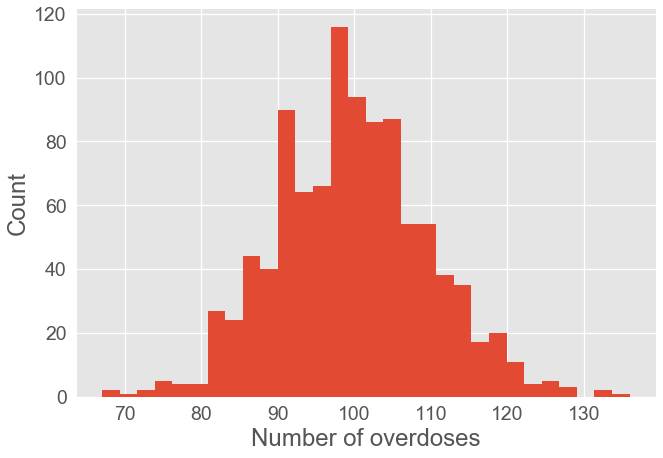

In [3]:
# define parameters
N,p = 10000,0.01

# perform draw
x = np.random.binomial(N,p,size=1000)

# plot histogram (add semi-colons to plt commands to suppress output)
plt.figure();
plt.hist(x,bins=30);
plt.xlabel('Number of overdoses');
plt.ylabel('Count');

### Hints

Use <kbd>↹ Tab</kbd> for auto-complete (helpful if can't remember exact commands). Use <kbd>⇧ Shift</kbd>+<kbd>↹ Tab</kbd> in order to view the doc-string for a particular method (helpful to see what method does and what input it takes).

### Adding in time

Instead of having a process that's being generated for just a given month, imagine instead we want to generate the process over a number of months. Draw samples of the number of overdoses for a year using the following,

In [6]:
# define parameters
N,p = 10000,0.01

# define number of months and number of samples
n_months = 12
n_samples = 1000

# generate data
x = np.random.binomial(N,p,size=(n_months,n_samples))

# check the shape of the data generated
print('Data generated is a {} by {} array'.format(*x.shape))

Data generated is a 12 by 1000 array


### Stylistic point

Define a method to create a plot of the time-series data. For the method we use the [numpy docstring](https://numpydoc.readthedocs.io/en/latest/format.html). This provides a consistent way of documenting methods and makes it easier to use automatic documentation such as [sphinx](http://www.sphinx-doc.org/en/master/).

In [ ]:
def plot_data_timeseries(data, ):
    '''
    Plot 95 percentiles and interquartile range draws of time series data
    
    Parameters
    ----------
    
    data 
    '''
    plt.figure();
    lc,uc = np.percentile(x,[2.5,97.5],axis=0)

# Sensitivty Analyses

For more information on Bayesian model checking and sensitivity see Chapter 6 of Gelman: [Gelman, Andrew, et al. Bayesian data analysis. 2013.](http://www.stat.columbia.edu/~gelman/bayescomputation/bdachapter6.pdf)

## Leave one out cross validation

Want to know how much each individual dataset influences the results and how predictive the model is of that data. We can use a leave-one-out cross-validation scheme in order to accomplish this. For background on technique see [Sweeting, M. J., et al. *Estimating hepatitis C prevalence in England and Wales by synthesizing evidence from multiple data sources. Assessing data conflict and model fit.* Biostatistics 9.4 (2008): 715-734.](https://doi.org/10.1093/biostatistics/kxn004)

## Subjunctive Bayes

What if we were wrong about one of our priors? We can take a prior (for example, population at risk) and then change either the mean, variance or shape of the prior and then re-run analysis and compare posterior (this is known as subjunctive Bayes)

## Model comparison

Alternative model structures could be likely (e.g. what if probability of death following an overdose is being driven by other external factors?). We can re-create the model using these alternative hypotheses and re-fit to produce a posterior estimate. 

We can then either check:
0. The main model outcome to see if it robust to these changes
0. Use a Bayesian information criterion such as the Deviance Information Criterion (DIC) or Widely-Applicable Information Criterion (WAIC) in order to perform model selection